In [1]:
# Notebook to view the classifications of reactions used for set of retrosynthetic routes

In [1]:
import pandas as pd
import json
import sys
import os
import ast
import numpy as np

sys.path.append('../../../')

#import aizynthfinder.chem as chem
import aizynthfinder.analysis

from aizynthfinder.mcts.node import Node
from aizynthfinder.analysis import ReactionTree
from aizynthfinder.mcts.state import State
from aizynthfinder.chem import TreeMolecule
from aizynthfinder.context.collection import ContextCollection
from aizynthfinder.context.stock import StockException

from Maranga.utils.parse_multismiles import findkeys

import matplotlib.pyplot as plt

In [2]:
file_ext = '/data/localhost/not-backed-up/mokaya/exscientia/'

In [4]:
#load in opt_hashes
with open('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt4_class/opt_hashes.json', 'r') as f:
    s_opt_hash = json.load(f)

In [7]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt12_class/1/tg2_result2_std_opt12_2.hdf5'

data = pd.read_hdf(hdf_file, 'table')
solved_data = data.loc[(data.is_solved==True)]
print(len(solved_data))
reactions_1 = solved_data.trees.values

28


In [40]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt4_class/hdf5/tg2_results_std_opt4_4.hdf5'

data_3 = pd.read_hdf(hdf_file, 'table')

solved_data_3 = data.loc[(data_3.is_solved==True)]
reactions_3 = solved_data_3.trees.values

In [4]:
# # file location of json file
# json_file_1 = os.path.join(file_ext, 'aizynthfinder/Maranga/experiments/target_2/results/opt4_class/tg2_std_opt4_novelrxns.json')

# with open(json_file_1) as f:
#     data_1 = json.load(f)

# data_1_r = data_1.get('reaction trees')
# #data_1_r = [ast.literal_eval(i) for i in data_1_r]
# reactions_1 = [json.loads(i) for i in data_1_r]

In [55]:
# find classifications from list of reactio dicts and retuirn a dict with frequency
def count_reactions(rxns):
    templates = []
    templates_dict = {}
    for i in rxns:
        templates.extend(list(findkeys(i, 'classification')))

    print('# Templates: ', len(templates))

    for i in templates:
        if i in templates_dict:
            templates_dict[i] += 1
        else:
            templates_dict[i] = 1
    return templates_dict


In [56]:
templates_1 = count_reactions(reactions_1)
s_templates_1 = dict(sorted(templates_1.items(), key=lambda kv: kv[1], reverse=True))
print(len(s_templates_1))
print(s_templates_1.keys())


# Templates:  1079
35
dict_keys(['Heteroaryl N-alkylation', 'Unassigned', 'RCO2H deprotections', 'Alcohol to halide', 'Halogenation', 'Reductive amination', 'O-acylation to ester', 'NH deprotections', 'Ketone to alcohol', 'Other functional group interconversion', 'ROH deprotections', 'Ester to alcohol', 'Alcohols to aldehydes', 'N-acylation to amide', 'Other reductions', 'Amide to amine reduction', 'O-substitution', 'Other functional group addition', 'O-containing heterocycle formation', 'N-substitution with alkyl-X', 'Other Pd-catalyzed reactions (Negishi,Kumada,etc.)', 'RCO2H protections', 'Cyano or imine to amine', 'Oxidations at sulfur', 'NH protections', 'Alkene oxidative cleavage', 'Stille reaction', 'N-arylation with Ar-X', 'ROH protections', 'S-substitution', 'Nitro to amine reduction', 'Alkene to alkane', 'Nitrile to acid', 'Friedel-Crafts reaction', 'Acid to acid chloride'])


In [24]:
templates_2 = count_reactions(reactions_2)
print(len(templates_2))
s_templates_2 = dict(sorted(templates_2.items(), key=lambda kv: kv[1], reverse=True))
print

# Templates:  1226
37


In [57]:
templates_3 = count_reactions(reactions_3)
print(len(templates_3))
s_templates_3 = dict(sorted(templates_3.items(), key=lambda kv: kv[1], reverse=True))
print(s_templates_3.keys())

# Templates:  797
33
dict_keys(['Heteroaryl N-alkylation', 'Unassigned', 'RCO2H deprotections', 'Alcohol to halide', 'Reductive amination', 'NH deprotections', 'Halogenation', 'Ketone to alcohol', 'N-acylation to amide', 'O-acylation to ester', 'Amide to amine reduction', 'Alcohols to aldehydes', 'Other functional group interconversion', 'ROH deprotections', 'Ester to alcohol', 'Other reductions', 'Other functional group addition', 'O-containing heterocycle formation', 'N-substitution with alkyl-X', 'Other Pd-catalyzed reactions (Negishi,Kumada,etc.)', 'RCO2H protections', 'NH protections', 'Alkene oxidative cleavage', 'Stille reaction', 'O-substitution', 'N-arylation with Ar-X', 'ROH protections', 'S-substitution', 'Nitro to amine reduction', 'Alkene to alkane', 'Nitrile to acid', 'Friedel-Crafts reaction', 'Acid to acid chloride'])


In [44]:
for k, v in s_templates_1.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))

9a4c5ceadb3b4a753bb8f03491f138cd875a84f1d327e818237f90df 76        
9a5276992ccda13b6431b631a7a99deea628d1ae4a1226bec315ced4 53        
49c1628032788008e8b4aa844c67dfa3dc3da53c87bef32faff5e68f 52        
cca685540fa090059d4b84008cff5859b106a1b153e3a038da801bc9 49        
69b86575f88b9f0c270424306fd5889c8e4ec122f68301130afe06ca 43        
0d80cfa7f9d1ab63ceb7fdd7712d6120524088f3751de74832ede90b 43        
c558acaa3102f970d9cf390a86d77cc5b532eb6c24249bc9fee65f32 39        
84cba62ead5314a4bd98891d749886ccfe4174585a65261599c12670 38        
e189425e090fce77131c907ebf1468461240dd27d4457a40d701e43e 37        
53994dd2d8bb14288cdfb7c2951155e80ca49e2c98f7d531177a38b3 34        
c38df6bb72f417e54d2346e687e032ed86554f208af48effa9422912 27        
bc7193984167c71913195a0abce257da8748eb7d4b76769dceef2d3f 25        
0a02d2d47df007d05d29f7b852c5bfe9dcbd7a32224d027cc636bd27 22        
61df3886a0291f08a9e9f8293588d04d916daa376a54f86534b439c2 21        
9860ae00c69ec5f62a57f92b2877531856501cab10bf1692

In [45]:
for k, v in s_templates_3.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))


9a4c5ceadb3b4a753bb8f03491f138cd875a84f1d327e818237f90df 63        
9a5276992ccda13b6431b631a7a99deea628d1ae4a1226bec315ced4 53        
49c1628032788008e8b4aa844c67dfa3dc3da53c87bef32faff5e68f 52        
cca685540fa090059d4b84008cff5859b106a1b153e3a038da801bc9 49        
69b86575f88b9f0c270424306fd5889c8e4ec122f68301130afe06ca 43        
0d80cfa7f9d1ab63ceb7fdd7712d6120524088f3751de74832ede90b 43        
c558acaa3102f970d9cf390a86d77cc5b532eb6c24249bc9fee65f32 39        
84cba62ead5314a4bd98891d749886ccfe4174585a65261599c12670 38        
53994dd2d8bb14288cdfb7c2951155e80ca49e2c98f7d531177a38b3 25        
55396c1492cc3823f0701ef923544f9f4c1af584b69f4ce5650dc5ae 20        
164bcd5926595fb14a6a9bdfa6263711f1e81657ce47f1a9ea439ccb 16        
c38df6bb72f417e54d2346e687e032ed86554f208af48effa9422912 16        
e189425e090fce77131c907ebf1468461240dd27d4457a40d701e43e 14        
61df3886a0291f08a9e9f8293588d04d916daa376a54f86534b439c2 13        
491647e089969205d82bcdacc23232b9964014fa5e105ea5

In [11]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [46]:
# calculate the difference in template/transformation frequency between two dictionaries. 
def calculate_freq_difference(opt, std, hashes):
    difference = {}

    for i in hashes:
        o = opt.get(i)
        s = std.get(i)

        opt_total = sum(opt.values())
        std_total = sum(std.values())

        if o != None and s != None:
            difference[i] = (o/opt_total)*100 - (s/std_total)*100
        
            #print('Reaction not used before/after optimisation.')
    
    return difference

In [47]:
diff = calculate_freq_difference(s_templates_3, s_templates_1, s_opt_hash)
s_diff = dict(sorted(diff.items(), key=lambda kv: kv[1], reverse=True))

hashes_to_optimise = []
for key, val in s_diff.items():
    hashes_to_optimise.append(key)



In [49]:
print(hashes_to_optimise)
print(len(hashes_to_optimise))

['9a5276992ccda13b6431b631a7a99deea628d1ae4a1226bec315ced4', '49c1628032788008e8b4aa844c67dfa3dc3da53c87bef32faff5e68f', 'cca685540fa090059d4b84008cff5859b106a1b153e3a038da801bc9', '0d80cfa7f9d1ab63ceb7fdd7712d6120524088f3751de74832ede90b', '69b86575f88b9f0c270424306fd5889c8e4ec122f68301130afe06ca', 'c558acaa3102f970d9cf390a86d77cc5b532eb6c24249bc9fee65f32', '84cba62ead5314a4bd98891d749886ccfe4174585a65261599c12670', '9a4c5ceadb3b4a753bb8f03491f138cd875a84f1d327e818237f90df', '55396c1492cc3823f0701ef923544f9f4c1af584b69f4ce5650dc5ae', '164bcd5926595fb14a6a9bdfa6263711f1e81657ce47f1a9ea439ccb', '7399a60fd7378a24dfa10a10ff432b29a0c80f1c6d7ac70d27cfe818', 'ec4cadfa6747724043a249bd3bb87c9eeb325c6711c85ba00fa25604', 'e9afa703b0ce1ae6beee8caa75610d7a9299fc62a12297fdbddaa49d', '9bf4542b6ebf1b0dbc776e9c158fdb37e9984a15e06ba7fbdad968ad', 'e79b9f0e956cb38254670cbba4f53d0c22148efe9b15465e130440fe', '1eecabe0173fa39f206a365ccea98e2b763ff157e33c23433b777de4', '8f16a628bb96a958262751734b4546192243ce

<function matplotlib.pyplot.show(close=None, block=None)>

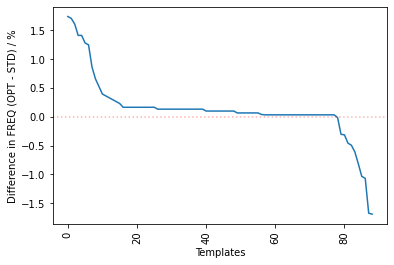

In [50]:
plt.plot(np.arange(len(s_diff.values())), s_diff.values())
plt.xticks(rotation=90)
plt.xlabel('Templates')
plt.ylabel('Difference in FREQ (OPT - STD) / %')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
plt.show

In [58]:
to_optimise_hash = []
for i in s_templates_2:
    if i not in s_templates_1:
        print(i)
        to_optimise_hash.append(i)

Dehydration


In [59]:
print(to_optimise_hash)
print('Length: ', len(to_optimise_hash))

['Dehydration']
Length:  1


In [60]:
print(s_templates_1)

{'Unassigned': 250, 'Heteroaryl N-alkylation': 201, 'Reductive amination': 158, 'Halogenation': 133, 'RCO2H deprotections': 110, 'Other functional group interconversion': 49, 'O-acylation to ester': 31, 'Amide to amine reduction': 27, 'Other reductions': 26, 'ROH deprotections': 20, 'O-substitution': 20, 'Alcohol to halide': 19, 'N-arylation with Ar-X': 18, 'Alcohols to aldehydes': 15, 'NH deprotections': 15, 'N-acylation to amide': 15, 'Friedel-Crafts reaction': 13, 'Ester to alcohol': 13, 'Stille reaction': 12, 'Acid to acid chloride': 11, 'Alkene oxidative cleavage': 9, 'S-substitution': 9, 'N-substitution with alkyl-X': 8, 'Ketone to alcohol': 8, 'O-sulfonylation': 7, 'Other functional group addition': 5, 'Nitro to amine reduction': 4, 'NH protections': 4, 'O-containing heterocycle formation': 3, 'Alkene to alkane': 3, 'Suzuki coupling': 2, 'Other deprotections': 2, 'Other organometallic C-C bond formation': 2, 'Cyano or imine to amine': 1, 'RSH deprotections': 1, 'Alkyne to alkane

In [61]:
s_total_1 = sum(list(s_templates_1.values()))
s_total_2 = sum(list(s_templates_2.values()))
print(s_total_1)
print(s_total_2)

1226
384


TypeError: unhashable type: 'slice'

In [62]:
for label, val in s_templates_1.items():
    prop = val / 1226
    for lab, v in s_templates_2.items():
        p = v / 1459
        if label == lab and p > prop:
            print(label)
            print('prop: ', prop)
            print('p: ', p)
            to_optimise_hash.append(label)
            print('')

Alcohol to halide
prop:  0.015497553017944535
p:  0.018505825908156272

O-containing heterocycle formation
prop:  0.0024469820554649264
p:  0.010966415352981495



In [63]:
print(to_optimise_hash)
print(len(to_optimise_hash))

['Dehydration', 'Alcohol to halide', 'O-containing heterocycle formation']
3


In [64]:
print(len(set(to_optimise_hash)))

3


[246, 189, 132, 129, 107, 57, 49, 47, 32, 32, 28, 23, 22, 16, 14, 13, 11, 11, 7, 5, 5, 4, 4, 3, 2]
[213, 168, 119, 107, 82, 34, 32, 13, 11, 9, 8, 7, 7, 5, 5, 4, 4, 4, 3, 3, 2, 2, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

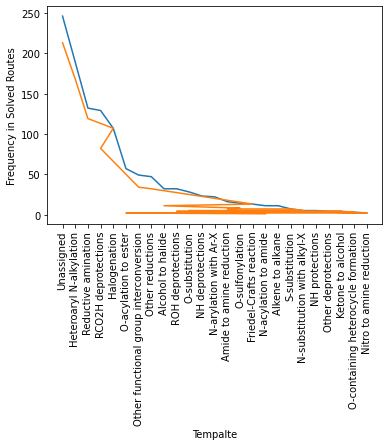

In [66]:
import matplotlib.pyplot as plt

temps = list(opt_s_templates_3.keys())
dc = list(opt_s_templates_3.values())

temps_1 = list(opt_s_templates_1.keys())
dc_1 = list(opt_s_templates_1.values())
print(dc)
print(dc_1)

plt.plot(temps, dc)
plt.plot(temps_1, dc_1)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Frequency in Solved Routes')
plt.show

In [58]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [70]:
opt_template_3 = {}
for k,v in s_templates_3.items():
    if k in opt_list:
        opt_template_3[k] = v

opt_s_templates_3 = dict(sorted(opt_template_3.items(), key=lambda kv: kv[1], reverse=True))

opt_template_1 = {}
for k,v in s_templates_1.items():
    if k in opt_list:
        opt_template_1[k] = v


for key in opt_o_temps:
    opt_template_1[key] = opt_template_1.pop(key)

print(len(opt_s_templates_3))


KeyError: 'Alkene to alkane'

In [69]:
o_temps=['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to ester', 'Other functional group interconversion', 'Other reductions', 'Alcohol to halide', 'ROH deprotections', 'O-substitution', 'NH deprotections', 'N-arylation with Ar-X', 'Amide to amine reduction', 'O-sulfonylation', 'Friedel-Crafts reaction', 'N-acylation to amide', 'Alkene to alkane', 'Acid to acid chloride', 'S-substitution', 'N-substitution with alkyl-X', 'NH protections', 'Other deprotections', 'Ketone to alcohol', 'O-containing heterocycle formation', 'Nitro to amine reduction', 'Alcohols to aldehydes']
opt_o_temps = [i for i in o_temps if i in opt_list]

Presence of Top transformations in solved routes.

In [4]:
top_opt = ["Unassigned", "Heteroaryl N-alkylation", "Alcohol to halide", "Reductive amination", "NH deprotections", "N`-acylation to amide", "Other functional group interconversion", "RCO2H deprotections", "Halogenation", "Ketone to alcohol"]

In [16]:
values = []
    
for e in range(1, 11):
    hdf = "/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_"+str(e)+"a.hdf5"
    print("HDF5: ", hdf)

    data = pd.read_hdf(hdf, 'table')
    solved_data = data.loc[(data.is_solved==True)]
    reactions_1 = solved_data.trees.values

    total = []
    print("# of Reactions: ", len(reactions_1))
    for ind, r in enumerate(reactions_1):
        rf = []
        templates = []
        templates.extend(list(findkeys(r, 'classification')))
        for index in range(1, len(top_opt)+1):
            top = top_opt[:index]
            #print('Top: ', index)
            length = len([x for x in templates if x in top])
            rf.append(length)
        total.append(rf)
        #print(vars()[str(ind)])
            #print('Top '+str(index)+' is '+ str(length))

    values.append(total)


        

HDF5:  /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_1a.hdf5
# of Reactions:  20
HDF5:  /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_2a.hdf5
# of Reactions:  24
HDF5:  /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_3a.hdf5
# of Reactions:  22
HDF5:  /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_4a.hdf5
# of Reactions:  22
HDF5:  /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_5a.hdf5
# of Reactions:  19
HDF5:  /data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt13_class/tg2_result_std_opt13_6a.hdf5
# of Reactions:  1

[[84, 100, 104, 109, 113, 113, 113, 116, 125, 129], [0, 5, 5, 6, 6, 6, 8, 8, 8, 8], [39, 40, 40, 42, 42, 42, 42, 42, 42, 42], [5, 5, 5, 6, 9, 9, 9, 9, 9, 9], [2, 2, 2, 4, 4, 4, 4, 4, 6, 6], [20, 25, 28, 30, 31, 31, 33, 33, 35, 36], [0, 5, 9, 9, 9, 9, 9, 9, 9, 9], [18, 21, 24, 27, 27, 27, 27, 32, 32, 35], [11, 11, 11, 15, 15, 15, 15, 15, 15, 15], [26, 26, 26, 27, 27, 27, 27, 29, 29, 29], [50, 53, 54, 59, 59, 59, 62, 66, 69, 70], [19, 23, 23, 25, 25, 25, 25, 25, 25, 25], [18, 24, 26, 30, 30, 30, 30, 35, 35, 37], [20, 22, 22, 32, 32, 32, 34, 39, 41, 41], [16, 21, 21, 22, 22, 22, 22, 22, 22, 22], [18, 20, 20, 21, 21, 21, 22, 24, 24, 24], [30, 35, 37, 40, 40, 40, 40, 50, 52, 55], [2, 18, 18, 20, 20, 20, 20, 20, 20, 20], [20, 26, 27, 35, 35, 35, 36, 38, 43, 44], [15, 21, 23, 23, 23, 23, 23, 23, 24, 24]]
[array([4.5 , 1.1 , 2.85, 0.4 , 0.  , 0.55, 1.9 , 1.3 , 0.75]), array([12.25      ,  1.70833333,  2.41666667,  0.41666667,  0.        ,
        2.125     ,  0.125     ,  3.41666667,  1.041666

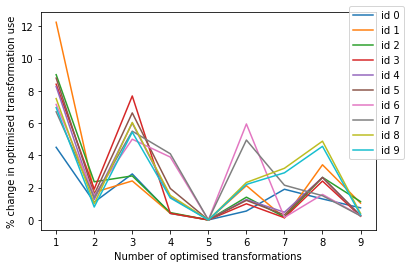

In [35]:
print(values[0])

all_diff = []
for i in values:
    some_diff = []
    for p in i:
        xdiff = [p[n]-p[n-1] for n in range(1,len(p))]
        p_xdiff = [(i/p[-1])*100 for i in xdiff]
        some_diff.append(xdiff)
    all_diff.append(some_diff)

all_means = []
for i in all_diff:
    means = np.array(i)
    all_means.append(np.mean(means, axis=0))

print(all_means)

x = np.arange(1,10,1)
y = all_means
plt.xlabel("Number of optimised transformations")
plt.ylabel("% change in optimised transformation use")

for ind, i in enumerate(y):
    plt.plot(x,i,label = 'id %s'%ind)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
    


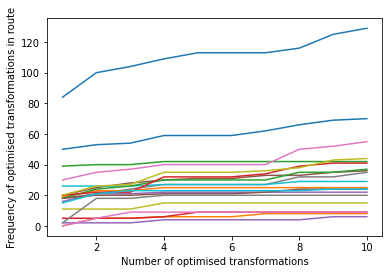

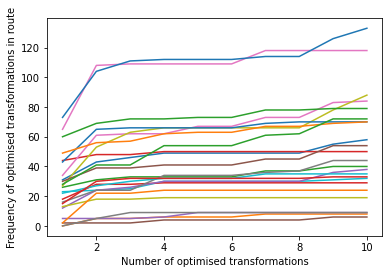

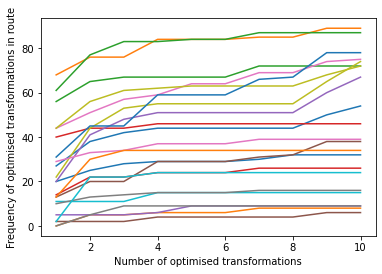

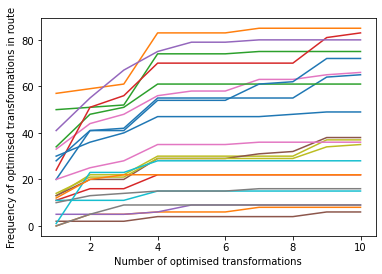

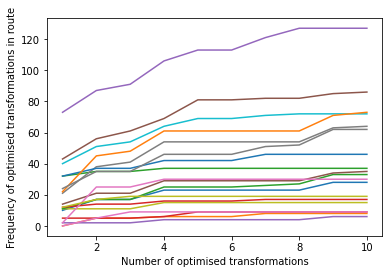

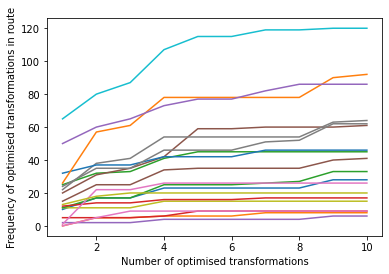

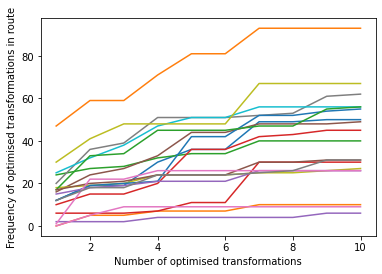

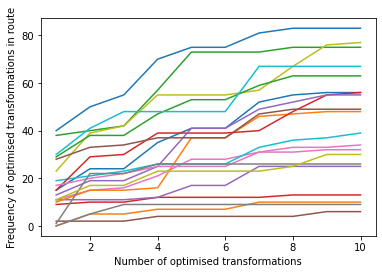

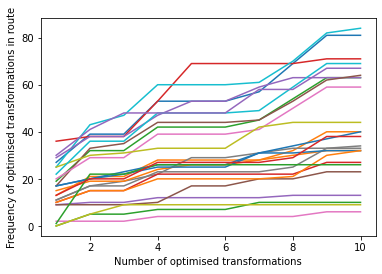

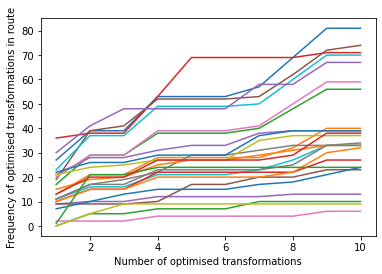

In [21]:
import matplotlib.pyplot as plt

for ind, i in enumerate(values):
    x = np.arange(1,11,1)
    y = i
    plt.xlabel("Number of optimised transformations")
    plt.ylabel("Frequency of optimised transformations in route")

    for ind, i in enumerate(y):
        plt.plot(x,i,label = 'reaction %s'%ind)

    plt.show()

In [22]:
print(len(values))

10


ValueError: x and y must have same first dimension, but have shapes (10,) and (215,)

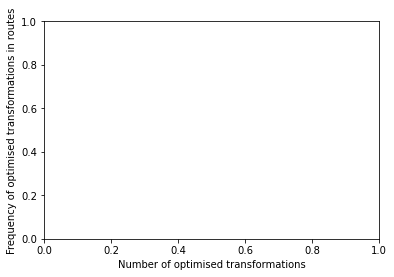

In [26]:
import matplotlib.pyplot as plt
x = np.arange(1,11,1)
y = values
plt.xlabel("Number of optimised transformations")
plt.ylabel("Frequency of optimised transformations in routes")

for i in range(len(y[0])):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%i)
plt.legend()
plt.show()